In [5]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'f62622e6-fcf8-49a8-8b91-ae0d8ab16c64',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-09-20T07:59:57.627Z', 'error_code': 0, 'error_message': None, 'elapsed': 29, 'credit_count': 1, 'notice': None, 'total_count': 9806}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11705, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [7]:
type(data)

dict

In [9]:
import pandas as pd
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [11]:
df=pd.json_normalize(data['data'])
df["timestamp"]=pd.to_datetime("now")
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11705,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.975648e+07,1.975648e+07,False,NaN,1,NaN,NaN,None,2024-09-20T07:57:00.000Z,63586.085715,4.171493e+10,-11.3549,-0.332378,2.375430,9.395379,6.445551,-5.545985,-1.367749,1.256237e+12,56.7037,1.335308e+12,None,2024-09-20T07:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-20 13:30:15.651900
1,1027,Ethereum,ETH,ethereum,9317,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.203459e+08,1.203459e+08,True,NaN,2,NaN,NaN,None,2024-09-20T07:57:00.000Z,2567.581318,1.975727e+10,-5.9354,0.153078,5.355448,9.310154,-1.299732,-26.282216,-26.485985,3.089980e+11,13.9586,3.089980e+11,None,2024-09-20T07:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-20 13:30:15.651900
2,825,Tether USDt,USDT,tether,98037,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.190728e+11,1.213868e+11,True,NaN,3,NaN,NaN,None,2024-09-20T07:57:00.000Z,1.000369,6.892189e+10,-4.8047,0.042841,0.017980,0.022563,0.009297,0.011643,0.097963,1.191168e+11,5.3767,1.214316e+11,None,2024-09-20T07:57:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-09-20 13:30:15.651900
3,1839,BNB,BNB,bnb,2237,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459337e+08,1.459337e+08,False,NaN,4,NaN,NaN,None,2024-09-20T07:57:00.000Z,574.066713,1.936975e+09,8.9183,-0.249053,3.042390,5.868537,2.164562,-3.429203,-2.145538,8.377568e+10,3.7815,8.377568e+10,None,2024-09-20T07:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-20 13:30:15.651900
4,5426,Solana,SOL,solana,737,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.684917e+08,5.849202e+08,True,NaN,5,NaN,NaN,None,2024-09-20T07:57:00.000Z,150.973608,3.188647e+09,8.0254,-0.312147,8.901185,12.296350,5.568843,-15.561505,12.145668,7.072989e+10,3.1930,8.830751e+10,None,2024-09-20T07:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-20 13:30:15.651900
5,3408,USDC,USDC,usd-coin,22144,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.555699e+10,3.555699e+10,False,NaN,6,NaN,NaN,None,2024-09-20T07:57:00.000Z,0.999964,6.938354e+09,-13.3524,0.011223,-0.006509,-0.006505,-0.008417,-0.006536,0.004335,3.555571e+10,1.6051,3.555571e+10,None,2024-09-20T07:57:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-09-20 13:30:15.651900
6,52,XRP,XRP,xrp,1391,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.643451e+10,9.998721e+10,False,NaN,7,NaN,NaN,None,2024-09-20T07:58:00.000Z,0.590916,1.314301e+09,4.8830,0.408792,1.033344,4.804701,-1.265147,-1.353099,21.465386,3.334808e+10,1.5053,5.909164e+10,None,2024-09-20T07:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-20 13:30:15.651900
7,74,Dogecoin,DOGE,dogecoin,1067,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.460318e+11,1.460318e+11,True,NaN,8,NaN,NaN,None,2024-09-20T07:58:00.000Z,0.106768,6.628770e+08,1.4420,-0.152325,2.465485,3.153191,2.052854,-22.266343,-13.857495,1.559146e+10,0.7038,1.559146e+10,None,2024-09-20T07:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-20 13:30:15.651900
8,11419,Toncoin,TON,toncoin,557,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.532619e+09,5.11207

In [13]:
def api_runner():

    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'f62622e6-fcf8-49a8-8b91-ae0d8ab16c64',
    }
    
    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    data = json.loads(response.text)

    
    df=pd.json_normalize(data['data'])
    df["timestamp"]=pd.to_datetime("now")
    df
    if not os.path.isfile(r"C:\Users\benne\Downloads\Kenny's files\Project\python Pandas\Auto Crypto API Pulling\API.csv"):
        df.to_csv(r"C:\Users\benne\Downloads\Kenny's files\Project\python Pandas\Auto Crypto API Pulling\API.csv",header="column_name")
    else:
        df.to_csv(r"C:\Users\benne\Downloads\Kenny's files\Project\python Pandas\Auto Crypto API Pulling\API.csv",mode="a",header=False)


In [15]:
import os
from time import sleep
from time import time

for i in range(333):
    api_runner()
    print("Api Runner Completed Successfully")
    sleep(60)
exit()

Api Runner Completed Successfully
Api Runner Completed Successfully
Api Runner Completed Successfully
Api Runner Completed Successfully
Api Runner Completed Successfully


KeyboardInterrupt: 

In [17]:
df3=pd.read_csv(r"C:\Users\benne\Downloads\Kenny's files\Project\python Pandas\Auto Crypto API Pulling\API.csv")
df3

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11705,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.975648e+07,1.975648e+07,False,NaN,1,NaN,NaN,NaN,2024-09-20T07:57:00.000Z,63586.085715,4.171493e+10,-11.3549,-0.332378,2.375430,9.395379,6.445551,-5.545985,-1.367749,1.256237e+12,56.7037,1.335308e+12,NaN,2024-09-20T07:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-20 13:30:29.470503
1,1,1027,Ethereum,ETH,ethereum,9317,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.203459e+08,1.203459e+08,True,NaN,2,NaN,NaN,NaN,2024-09-20T07:57:00.000Z,2567.581318,1.975727e+10,-5.9354,0.153078,5.355448,9.310154,-1.299732,-26.282216,-26.485985,3.089980e+11,13.9586,3.089980e+11,NaN,2024-09-20T07:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-20 13:30:29.470503
2,2,825,Tether USDt,USDT,tether,98037,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.190728e+11,1.213868e+11,True,NaN,3,NaN,NaN,NaN,2024-09-20T07:57:00.000Z,1.000369,6.892189e+10,-4.8047,0.042841,0.017980,0.022563,0.009297,0.011643,0.097963,1.191168e+11,5.3767,1.214316e+11,NaN,2024-09-20T07:57:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-09-20 13:30:29.470503
3,3,1839,BNB,BNB,bnb,2237,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.459337e+08,1.459337e+08,False,NaN,4,NaN,NaN,NaN,2024-09-20T07:57:00.000Z,574.066713,1.936975e+09,8.9183,-0.249053,3.042390,5.868537,2.164562,-3.429203,-2.145538,8.377568e+10,3.7815,8.377568e+10,NaN,2024-09-20T07:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-20 13:30:29.470503
4,4,5426,Solana,SOL,solana,737,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.684917e+08,5.849202e+08,True,NaN,5,NaN,NaN,NaN,2024-09-20T07:57:00.000Z,150.973608,3.188647e+09,8.0254,-0.312147,8.901185,12.296350,5.568843,-15.561505,12.145668,7.072989e+10,3.1930,8.830751e+10,NaN,2024-09-20T07:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-20 13:30:29.470503
5,5,3408,USDC,USDC,usd-coin,22144,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.555699e+10,3.555699e+10,False,NaN,6,NaN,NaN,NaN,2024-09-20T07:57:00.000Z,0.999964,6.938354e+09,-13.3524,0.011223,-0.006509,-0.006505,-0.008417,-0.006536,0.004335,3.555571e+10,1.6051,3.555571e+10,NaN,2024-09-20T07:57:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-09-20 13:30:29.470503
6,6,52,XRP,XRP,xrp,1391,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.643451e+10,9.998721e+10,False,NaN,7,NaN,NaN,NaN,2024-09-20T07:58:00.000Z,0.590916,1.314301e+09,4.8830,0.408792,1.033344,4.804701,-1.265147,-1.353099,21.465386,3.334808e+10,1.5053,5.909164e+10,NaN,2024-09-20T07:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-20 13:30:29.470503
7,7,74,Dogecoin,DOGE,dogecoin,1067,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.460318e+11,1.460318e+11,True,NaN,8,NaN,NaN,NaN,2024-09-20T07:58:00.000Z,0.106768,6.628770e+08,1.4420,-0.152325,2.465485,3.153191,2.052854,-22.266343,-13.857495,1.559146e+10,0.7038,1.559146e+10,NaN,2024-09-20T07:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-20 13:30:29.470503
8,8,11419,Toncoin,TON,toncoin,557,2021-08-26T13:40:22.000Z,"['pos', 'layer-1', 'ftx-bankruptcy-estate', 'd...",NaN,2.53261

In [19]:
pd.set_option("display.float_format",lambda x:"%5f" %x)

In [21]:
df3

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11705,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.000000,19756484.000000,19756484.000000,False,NaN,1,NaN,NaN,NaN,2024-09-20T07:57:00.000Z,63586.085715,41714926245.777519,-11.354900,-0.332378,2.375430,9.395379,6.445551,-5.545985,-1.367749,1256237485055.265381,56.703700,1335307800019.510010,NaN,2024-09-20T07:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-20 13:30:29.470503
1,1,1027,Ethereum,ETH,ethereum,9317,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120345932.992572,120345932.992572,True,NaN,2,NaN,NaN,NaN,2024-09-20T07:57:00.000Z,2567.581318,19757272861.010937,-5.935400,0.153078,5.355448,9.310154,-1.299732,-26.282216,-26.485985,308997969248.273987,13.958600,308997969248.270020,NaN,2024-09-20T07:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-20 13:30:29.470503
2,2,825,Tether USDt,USDT,tether,98037,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,119072842113.356461,121386817751.624435,True,NaN,3,NaN,NaN,NaN,2024-09-20T07:57:00.000Z,1.000369,68921888791.658325,-4.804700,0.042841,0.017980,0.022563,0.009297,0.011643,0.097963,119116798467.576599,5.376700,121431628321.889999,NaN,2024-09-20T07:57:00.000Z,1027.000000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-09-20 13:30:29.470503
3,3,1839,BNB,BNB,bnb,2237,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,145933708.580399,145933708.580399,False,NaN,4,NaN,NaN,NaN,2024-09-20T07:57:00.000Z,574.066713,1936975131.081831,8.918300,-0.249053,3.042390,5.868537,2.164562,-3.429203,-2.145538,83775684366.428558,3.781500,83775684366.429993,NaN,2024-09-20T07:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-20 13:30:29.470503
4,4,5426,Solana,SOL,solana,737,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,468491732.245479,584920172.859825,True,NaN,5,NaN,NaN,NaN,2024-09-20T07:57:00.000Z,150.973608,3188647001.791966,8.025400,-0.312147,8.901185,12.296350,5.568843,-15.561505,12.145668,70729886911.904495,3.193000,88307508609.759995,NaN,2024-09-20T07:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-20 13:30:29.470503
5,5,3408,USDC,USDC,usd-coin,22144,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,35556991081.385262,35556991081.385262,False,NaN,6,NaN,NaN,NaN,2024-09-20T07:57:00.000Z,0.999964,6938353625.668709,-13.352400,0.011223,-0.006509,-0.006505,-0.008417,-0.006536,0.004335,35555708223.776154,1.605100,35555708223.779999,NaN,2024-09-20T07:57:00.000Z,1027.000000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-09-20 13:30:29.470503
6,6,52,XRP,XRP,xrp,1391,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.000000,56434507880.000000,99987205428.000000,False,NaN,7,NaN,NaN,NaN,2024-09-20T07:58:00.000Z,0.590916,1314300759.933732,4.883000,0.408792,1.033344,4.804701,-1.265147,-1.353099,21.465386,33348075589.314808,1.505300,59091638860.790001,NaN,2024-09-20T07:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-20 13:30:29.470503
7,7,74,Dogecoin,DOGE,dogecoin,1067,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,146031776383.705200,146031776383.705200,True,NaN,8,NaN,NaN,NaN,2024-09-20T07:58:00.000Z,0.106768,662876984.840106,1.442000,-0.152325,2.465485,3.153

In [23]:
df4=df.groupby("name",sort =False)[["quote.USD.percent_change_1h","quote.USD.percent_change_24h","quote.USD.percent_change_7d","quote.USD.percent_change_30d","quote.USD.percent_change_60d","quote.USD.percent_change_90d"]].mean()
df4

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.418217,2.223360,9.243662,6.025249,-5.596062,-1.523411
Ethereum,0.010570,5.124110,9.102479,-1.648059,-26.347510,-26.604571
Tether USDt,-0.006270,0.010523,-0.025304,-0.018438,-0.010688,0.080956
BNB,-0.346294,2.950859,5.685181,2.164449,-3.448301,-2.246360
Solana,-0.231425,8.957191,12.177578,5.358071,-15.409268,12.017905
USDC,-0.013883,0.008954,-0.042676,0.011505,0.002380,0.002995
XRP,0.319305,0.970286,4.805991,-1.301370,-1.278225,21.464980
Dogecoin,-0.230225,2.382063,3.116336,1.886330,-22.161297,-13.935921
Toncoin,-0.523147,0.142057,4.389906,-13.568279,-18.529919,-19.882552


In [25]:
df5=df4.stack()
df5

name                                      
Bitcoin       quote.USD.percent_change_1h     -0.418217
              quote.USD.percent_change_24h     2.223360
              quote.USD.percent_change_7d      9.243662
              quote.USD.percent_change_30d     6.025249
              quote.USD.percent_change_60d    -5.596062
              quote.USD.percent_change_90d    -1.523411
Ethereum      quote.USD.percent_change_1h      0.010570
              quote.USD.percent_change_24h     5.124110
              quote.USD.percent_change_7d      9.102479
              quote.USD.percent_change_30d    -1.648059
              quote.USD.percent_change_60d   -26.347510
              quote.USD.percent_change_90d   -26.604571
Tether USDt   quote.USD.percent_change_1h     -0.006270
              quote.USD.percent_change_24h     0.010523
              quote.USD.percent_change_7d     -0.025304
              quote.USD.percent_change_30d    -0.018438
              quote.USD.percent_change_60d    -0.010688
     

In [31]:
df6=df5.to_frame(name="values")
df6

values
name                                                
Bitcoin      quote.USD.percent_change_1h   -0.418217
             quote.USD.percent_change_24h   2.223360
             quote.USD.percent_change_7d    9.243662
             quote.USD.percent_change_30d   6.025249
             quote.USD.percent_change_60d  -5.596062
             quote.USD.percent_change_90d  -1.523411
Ethereum     quote.USD.percent_change_1h    0.010570
             quote.USD.percent_change_24h   5.124110
             quote.USD.percent_change_7d    9.102479
             quote.USD.percent_change_30d  -1.648059
             quote.USD.percent_change_60d -26.347510
             quote.USD.percent_change_90d -26.604571
Tether USDt  quote.USD.percent_change_1h   -0.006270
             quote.USD.percent_change_24h   0.010523
             quote.USD.percent_change_7d   -0.025304
             quote.USD.percent_change_30d  -0.018438
             quote.USD.percent_change_60d  -0.010688
             quote.USD.percent_change_90d   0.080956
BNB          quote.USD.percent_change_1h   -0.346294
             quote.USD.percent_change_24h   2.950859
             quote.USD.percent_change_7d    5.685181
             quote.USD.percent_change_30d   2.164449
             quote.USD.percent_change_60d  -3.448301
             quote.USD.percent_change_90d  -2.246360
Solana       quote.USD.percent_change_1h   -0.231425
             quote.USD.percent_change_24h   8.957191
             quote.USD.percent_change_7d   12.177578
             quote.USD.percent_change_30d   5.358071
             quote.USD.percent_change_60d -15.409268
             quote.USD.percent_change_90d  12.017905
USDC         quote.USD.percent_change_1h   -0.013883
             quote.USD.percent_change_24h   0.008954
             quote.USD.percent_change_7d   -0.042676
             quote.USD.percent_change_30d   0.011505
             quote.USD.percent_change_60d   0.002380
             quote.USD.percent_change_90d   0.002995
XRP          quote.USD.percent_change_1h    0.319305
             quote.USD.percent_change_24h   0.970286
             quote.USD.percent_change_7d    4.805991
             quote.USD.percent_change_30d  -1.301370
             quote.USD.percent_change_60d  -1.278225
             quote.USD.percent_change_90d  21.464980
Dogecoin     quote.USD.percent_change_1h   -0.230225
             quote.USD.percent_change_24h   2.382063
             quote.USD.percent_change_7d    3.116336
             quote.USD.percent_change_30d   1.886330
             quote.USD.percent_change_60d -22.161297
             quote.USD.percent_change_90d -13.935921
Toncoin      quote.USD.percent_change_1h   -0.523147
             quote.USD.percent_change_24h   0.142057
             quote.USD.percent_change_7d    4.389906
             quote.USD.percent_change_30d -13.568279
             quote.USD.percent_change_60d -18.529919
             quote.USD.percent_change_90d -19.882552
TRON         quote.USD.percent_change_1h   -0.195750
             quote.USD.percent_change_24h   1.428559
             quote.USD.percent_change_7d    1.020948
             quote.USD.percent_change_30d  -5.634967
             quote.USD.percent_change_60d  11.875684
             quote.USD.percent_change_90d  28.416884
Cardano      quote.USD.percent_change_1h   -0.133085
             quote.USD.percent_change_24h   3.460537
             quote.USD.percent_change_7d    0.796113
             quote.USD.percent_change_30d   0.218354
             quote.USD.percent_change_60d -17.151405
             quote.USD.percent_change_90d  -4.296849
Avalanche    quote.USD.percent_change_1h   -0.250484
             quote.USD.percent_change_24h   8.913589
             quote.USD.percent_change_7d   18.377756
             quote.USD.percent_change_30d  20.979018
             quote.USD.percent_change_60d -11.627390
             quote.USD.percent_change_90d  11.570610
Shiba Inu    quote.USD.percent_change_1h   -0.285057
             quote.USD.percent_change_24h   2.711549
             quote

In [33]:
df6.count()

values    90
dtype: int64

In [35]:
index =pd.Index(range(90))
df7=df6.reset_index()
df7

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.418217
1,Bitcoin,quote.USD.percent_change_24h,2.223360
2,Bitcoin,quote.USD.percent_change_7d,9.243662
3,Bitcoin,quote.USD.percent_change_30d,6.025249
4,Bitcoin,quote.USD.percent_change_60d,-5.596062
5,Bitcoin,quote.USD.percent_change_90d,-1.523411
6,Ethereum,quote.USD.percent_change_1h,0.010570
7,Ethereum,quote.USD.percent_change_24h,5.124110
8,Ethereum,quote.USD.percent_change_7d,9.102479
9,Ethereum,quote.USD.percent_change_30d,-1.648059


In [37]:
df8=df7.rename(columns={"level_1":"percentage_change"})

In [39]:
df8["percentage_change"]=df8["percentage_change"].replace(["quote.USD.percent_change_1h","quote.USD.percent_change_24h","quote.USD.percent_change_7d","quote.USD.percent_change_30d","quote.USD.percent_change_60d","quote.USD.percent_change_90d"],["1h","24h","7d","30d","60d","90d"])
df8

,name,percentage_change,values
0,Bitcoin,1h,-0.418217
1,Bitcoin,24h,2.223360
2,Bitcoin,7d,9.243662
3,Bitcoin,30d,6.025249
4,Bitcoin,60d,-5.596062
5,Bitcoin,90d,-1.523411
6,Ethereum,1h,0.010570
7,Ethereum,24h,5.124110
8,Ethereum,7d,9.102479
9,Ethereum,30d,-1.648059


In [41]:
import seaborn as sns 
import matplotlib.pyplot as plt

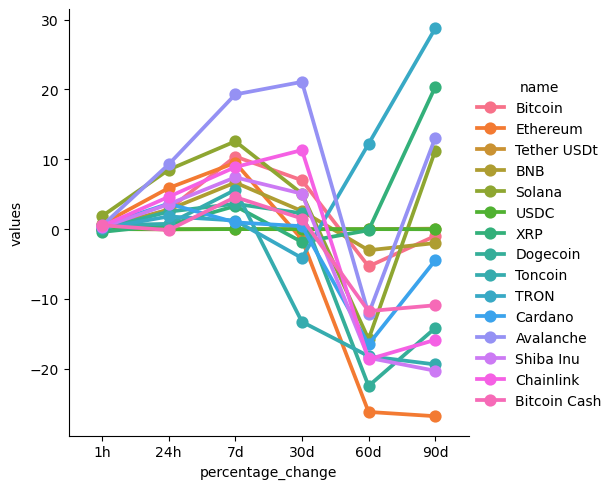

In [85]:
sns.catplot(x="percentage_change",y="values",hue="name",data=df8,kind="point")


In [51]:
df9=df3[["name","quote.USD.price","timestamp"]]
df9=df9.query("name == 'TRON'")
df9

,name,quote.USD.price,timestamp
9,TRON,0.152453,2024-09-20 13:30:29.470503
24,TRON,0.152416,2024-09-20 13:31:30.551436
39,TRON,0.152417,2024-09-20 13:32:31.612112
54,TRON,0.152410,2024-09-20 13:33:32.412768
69,TRON,0.152412,2024-09-20 13:34:33.354955


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

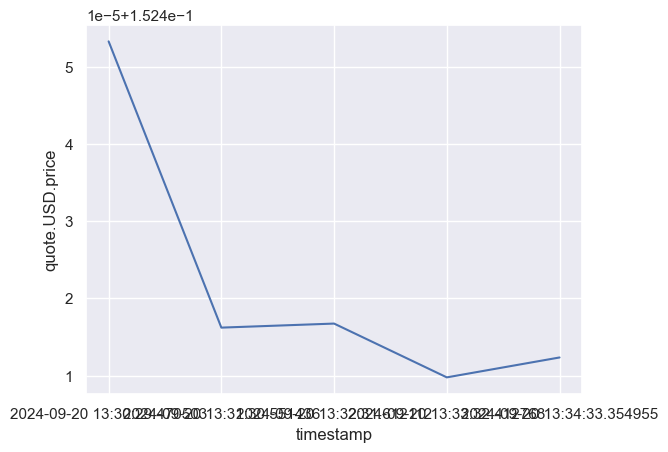

In [57]:
sns.set_theme(style ="darkgrid")
sns.lineplot(x="timestamp",y="quote.USD.price",data=df9)